In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("household_power_consumption.txt", sep=';', 
                 parse_dates={'DateTime':['Date','Time']},
                 infer_datetime_format=True, na_values='?', low_memory=False)

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29832\2119049455.py:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("household_power_consumption.txt", sep=';',
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29832\2119049455.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("household_power_consumption.txt", sep=';',
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29832\2119049455.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("household_power_consumption.txt", sep=';',


Shape of dataset: (2075259, 8)

Data Types:
 DateTime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

Missing Values:
 DateTime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Summary Statistics:
                             DateTime  Global_active_power  \
count                        2075259         2.049280e+06   
mean   2008-12-06 07:12:59.999994112         1.091615e+00   
min              2006-12-16 17:24:00         7.600000e-02   
25%              2007-12-12 00:18:30         3.080000e-01   
50%            

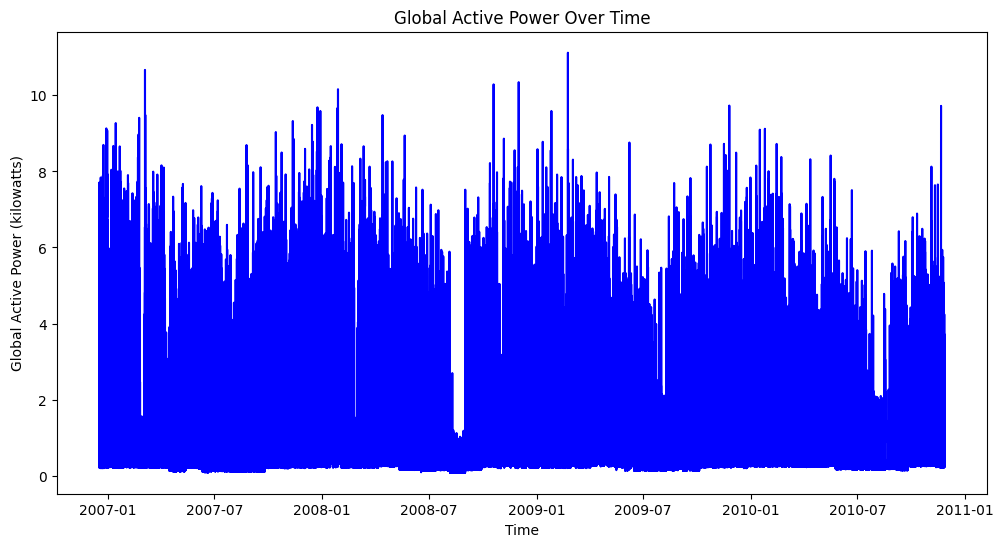

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['DateTime'], df['Global_active_power'], color='blue')
plt.title("Global Active Power Over Time")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kilowatts)")
plt.show()


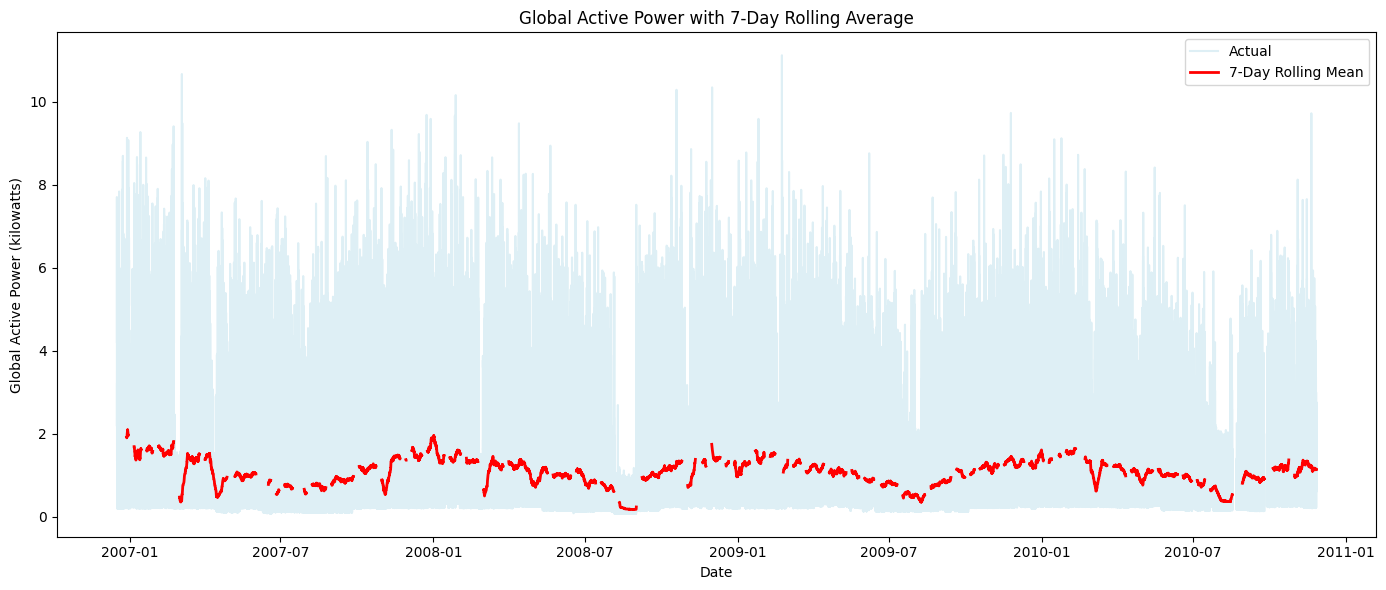

In [27]:
# Create a 7-day rolling mean
df['rolling_mean'] = df['Global_active_power'].rolling(window=60*24*7).mean()  # 60 min * 24 hrs * 7 days

plt.figure(figsize=(14,6))
plt.plot(df['DateTime'], df['Global_active_power'], color='lightblue', alpha=0.4, label='Actual')
plt.plot(df['DateTime'], df['rolling_mean'], color='red', linewidth=2, label='7-Day Rolling Mean')
plt.title("Global Active Power with 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kilowatts)")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9376\2156599154.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='DateTime')['Global_active_power'].mean()


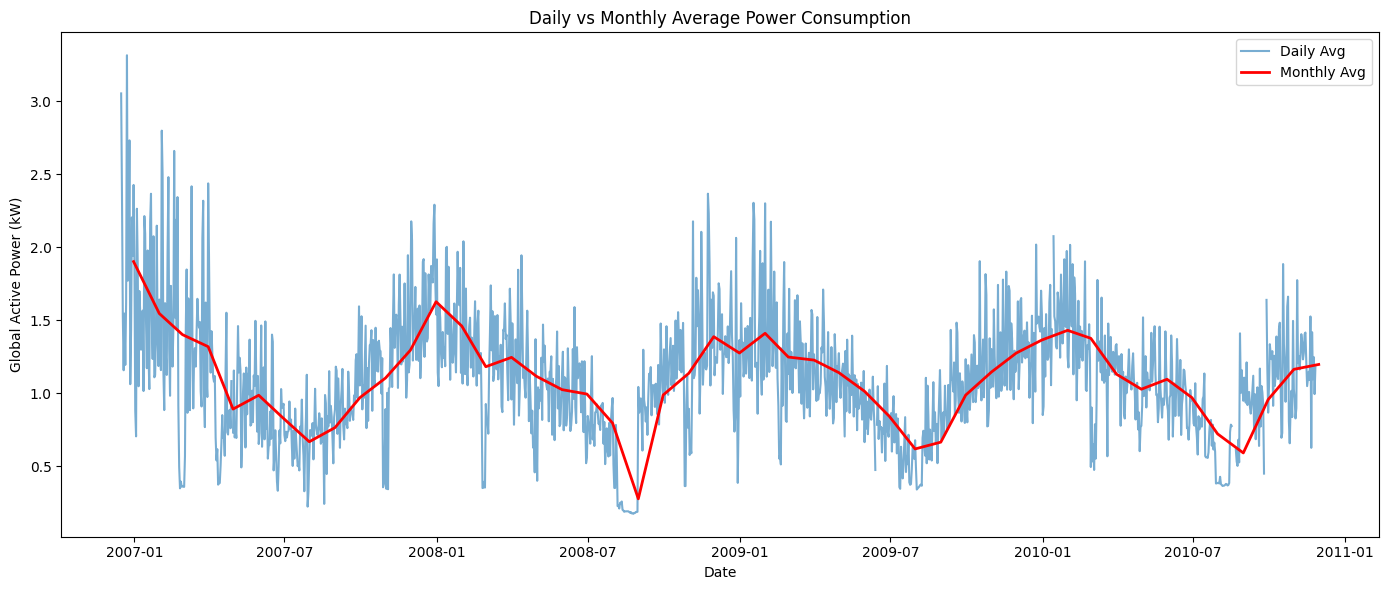

In [28]:
# Daily average
daily = df.resample('D', on='DateTime')['Global_active_power'].mean()
# Monthly average
monthly = df.resample('M', on='DateTime')['Global_active_power'].mean()

plt.figure(figsize=(14,6))
plt.plot(daily, label='Daily Avg', alpha=0.6)
plt.plot(monthly, color='red', linewidth=2, label='Monthly Avg')
plt.title("Daily vs Monthly Average Power Consumption")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.tight_layout()
plt.show()


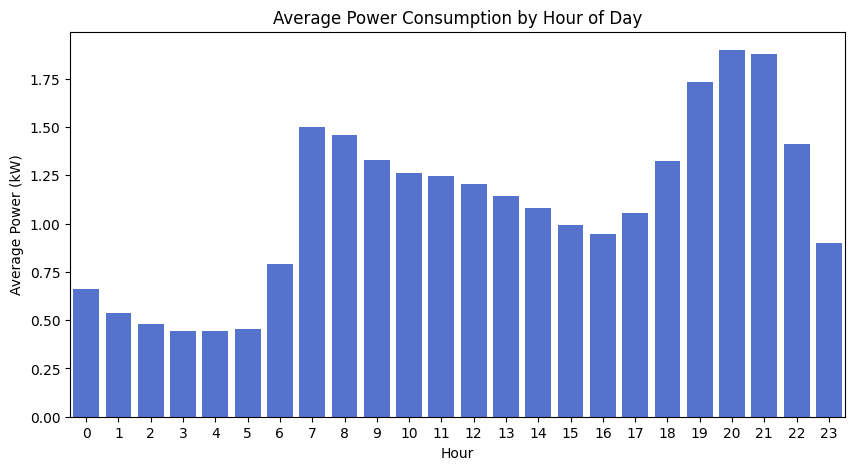

In [40]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
hourly_avg = df.groupby('Hour')['Global_active_power'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Global_active_power', data=hourly_avg, color='royalblue')
plt.title("Average Power Consumption by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Power (kW)")
plt.show()


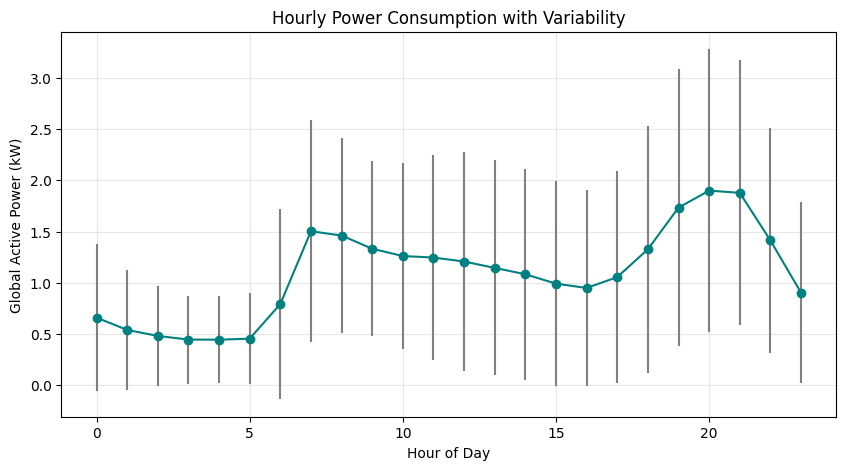

In [41]:
hourly_stats = df.groupby('Hour')['Global_active_power'].agg(['mean','std']).reset_index()

plt.figure(figsize=(10,5))
plt.errorbar(hourly_stats['Hour'], hourly_stats['mean'], yerr=hourly_stats['std'], fmt='-o', color='teal', ecolor='gray')
plt.title("Hourly Power Consumption with Variability")
plt.xlabel("Hour of Day")
plt.ylabel("Global Active Power (kW)")
plt.grid(alpha=0.3)
plt.show()


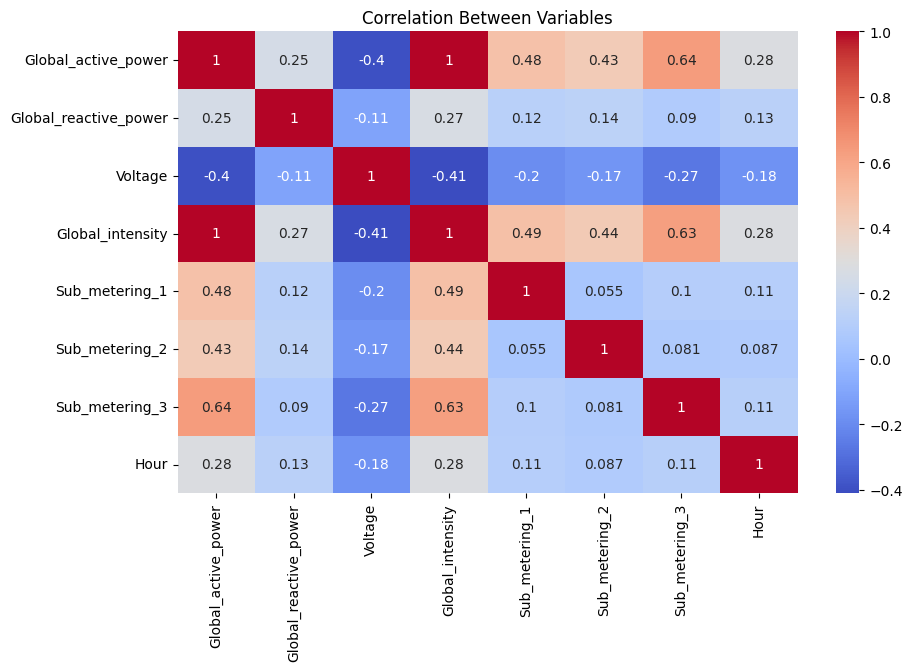

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Variables")
plt.show()

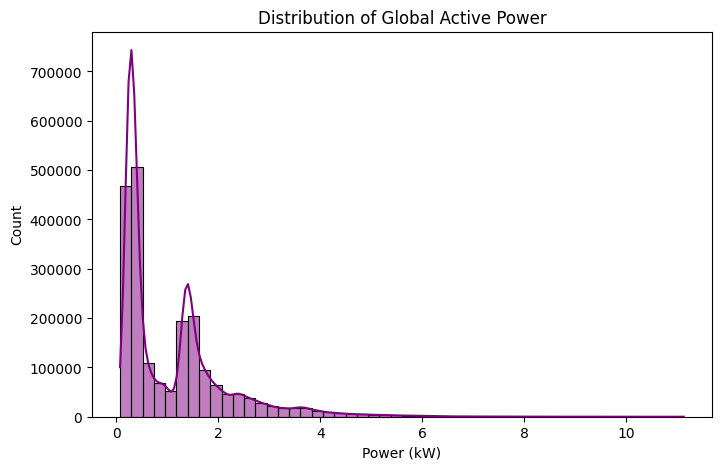

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df['Global_active_power'], bins=50, kde=True, color='purple')
plt.title("Distribution of Global Active Power")
plt.xlabel("Power (kW)")
plt.show()

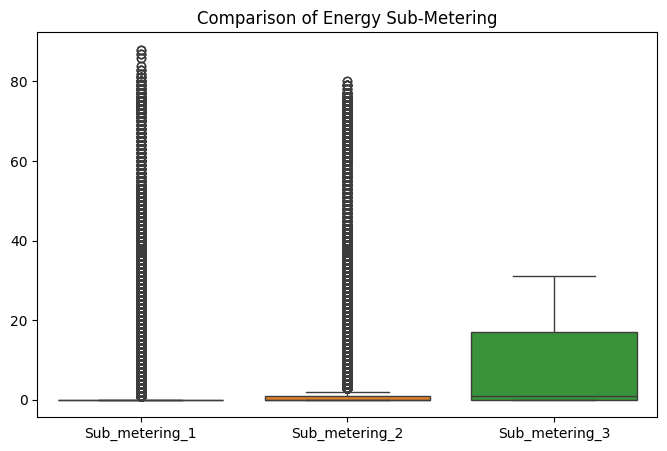

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
plt.title("Comparison of Energy Sub-Metering")
plt.show()

In [7]:
df = df.dropna()
df = df.sort_values('DateTime')
df.set_index('DateTime', inplace=True)

# Convert power to kW
df['Global_active_power'] = df['Global_active_power'].astype(float)

# Resample to hourly consumption
hourly = df['Global_active_power'].resample('H').mean().reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29832\3447330430.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = df['Global_active_power'].resample('H').mean().reset_index()


In [8]:
hourly['hour'] = hourly['DateTime'].dt.hour
hourly['day'] = hourly['DateTime'].dt.day
hourly['month'] = hourly['DateTime'].dt.month
hourly['dayofweek'] = hourly['DateTime'].dt.dayofweek
hourly['is_weekend'] = (hourly['dayofweek'] >= 5).astype(int)


hourly.dropna(inplace=True)
print(hourly.shape)

(34168, 7)


In [60]:
from prophet import Prophet

# Prepare data
df_prophet = hourly.rename(columns={'DateTime': 'ds', 'Global_active_power': 'y'})

# Train Prophet
model_prophet = Prophet(yearly_seasonality=True, daily_seasonality=True)
model_prophet.fit(df_prophet)

# Forecast next 24 hours
future = model_prophet.make_future_dataframe(periods=24*30, freq='H')
forecast = model_prophet.predict(future)
print(forecast.shape)

# Add Prophet predictions back to your original DataFrame
hourly['prophet_pred'] = forecast['yhat'][:len(hourly)].values

# Compute residuals using the correct column name
hourly['residual'] = hourly['Global_active_power'] - hourly['prophet_pred']



23:46:21 - cmdstanpy - INFO - Chain [1] start processing
23:46:31 - cmdstanpy - INFO - Chain [1] done processing
d:\Energy Consumption\Backend\energy_venv\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


(34864, 22)


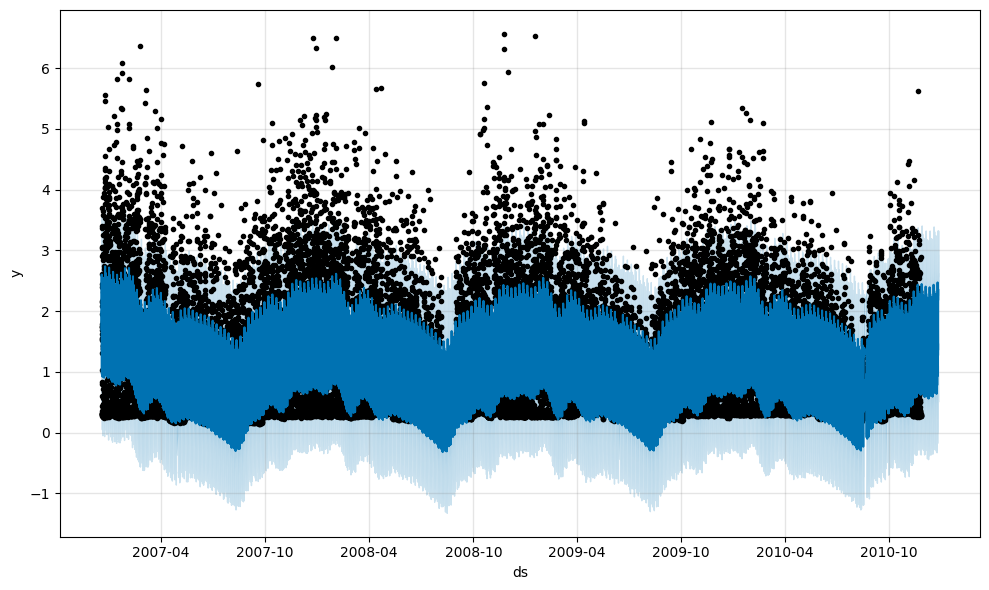

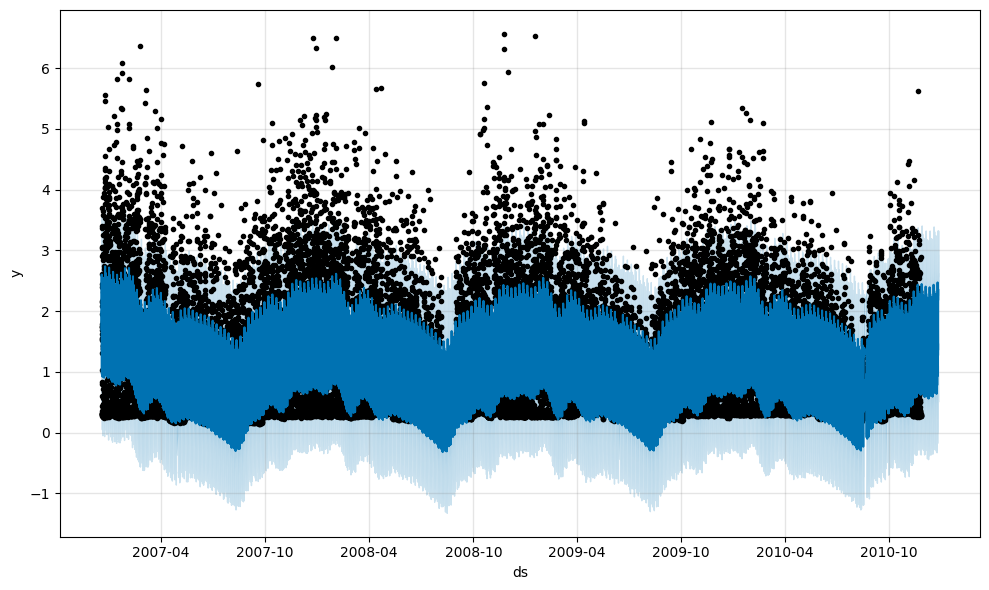

In [61]:
model_prophet.plot(forecast)

Figure(900x1200)


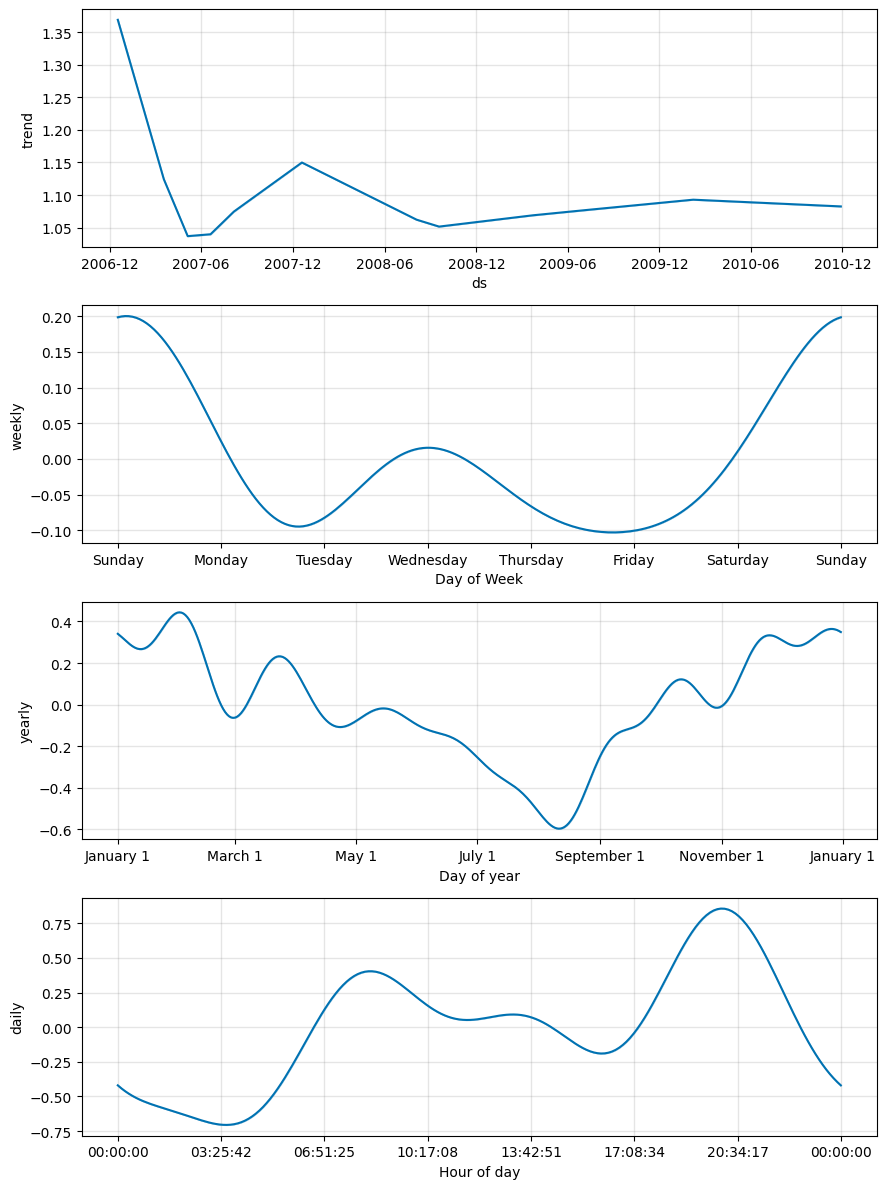

                     Global_active_power  Global_reactive_power  Voltage  \
DateTime                                                                   
2010-11-26 20:58:00                0.946                    0.0   240.43   
2010-11-26 20:59:00                0.944                    0.0   240.00   
2010-11-26 21:00:00                0.938                    0.0   239.82   
2010-11-26 21:01:00                0.934                    0.0   239.70   
2010-11-26 21:02:00                0.932                    0.0   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00          

In [23]:
print(model_prophet.plot_components(forecast))
plt.show()
print(df.tail())

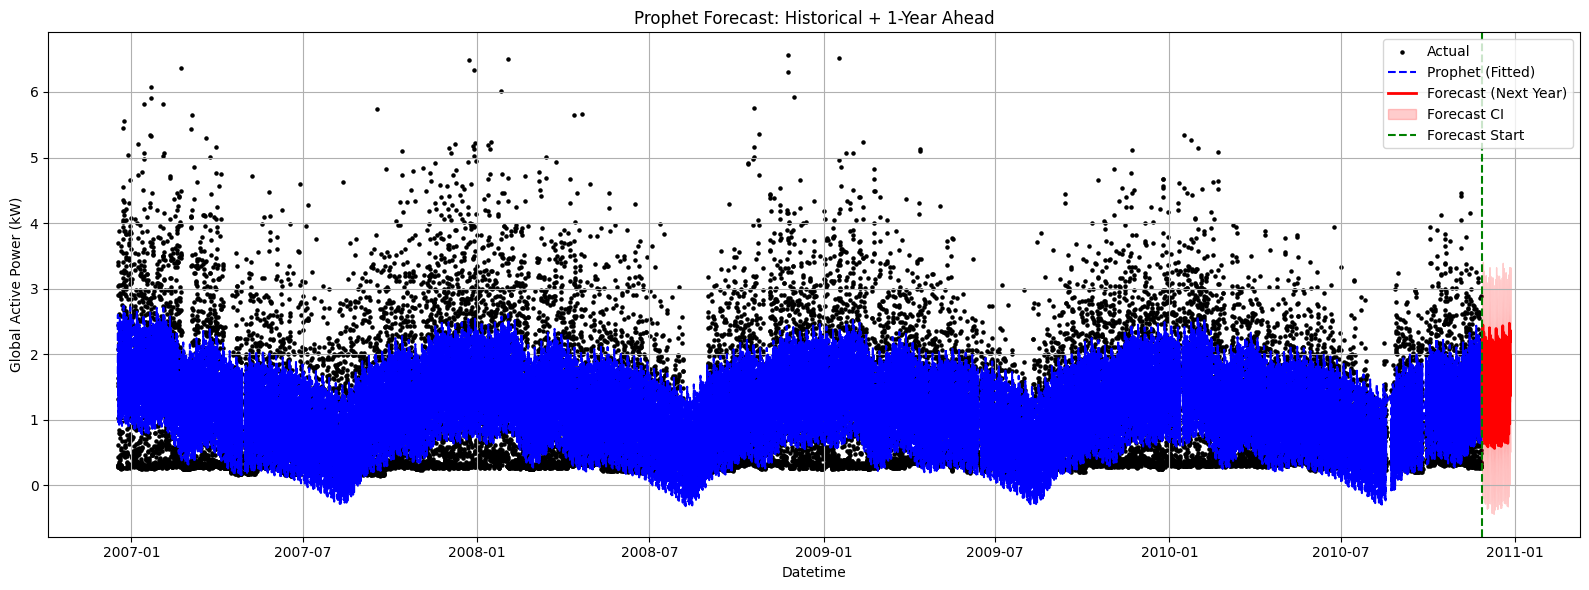

In [62]:
import matplotlib.pyplot as plt

# Historical limit
last_actual_time = hourly['DateTime'].max()

# Split forecast into history + future
history_pred = forecast[forecast['ds'] <= last_actual_time]
future_pred = forecast[forecast['ds'] > last_actual_time]

plt.figure(figsize=(16,6))

# 1. Actual data (scatter to match Prophet style)
plt.scatter(hourly['DateTime'], hourly['Global_active_power'],
            color='black', s=5, label='Actual')

# 2. Prophet fitted on history
plt.plot(history_pred['ds'], history_pred['yhat'],
         color='blue', linestyle='--', label='Prophet (Fitted)')

# 3. Forecast for next year
plt.plot(future_pred['ds'], future_pred['yhat'],
         color='red', linewidth=2, label='Forecast (Next Year)')

# 4. Confidence interval for forecast
plt.fill_between(future_pred['ds'], future_pred['yhat_lower'], future_pred['yhat_upper'],
                 color='red', alpha=0.2, label='Forecast CI')

# Vertical line to mark where forecast starts
plt.axvline(x=last_actual_time, color='green', linestyle='--', linewidth=1.5,
            label='Forecast Start')

plt.title('Prophet Forecast: Historical + 1-Year Ahead')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
import numpy as np
hourly = hourly.dropna(subset=['residual']).reset_index(drop=True)
print("Residuals summary:")
print(hourly['residual'].describe())
print("Any NaN:", hourly['residual'].isna().sum())
print("Any Inf:", np.isinf(hourly['residual']).sum())



Residuals summary:
count    34144.000000
mean        -0.000022
std          0.728278
min         -2.152268
25%         -0.483361
50%         -0.084543
75%          0.366026
max          4.982855
Name: residual, dtype: float64
Any NaN: 0
Any Inf: 0


In [13]:
from sklearn.preprocessing import StandardScaler

# Scale the residuals
scaler = StandardScaler()
scaled_residuals = scaler.fit_transform(hourly[['residual']])

# Create sliding windows (using past 24 hours to predict the next hour’s residual)
X, y = [], []
for i in range(24, len(scaled_residuals)):
    X.append(scaled_residuals[i-24:i, 0])
    y.append(scaled_residuals[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)   # reshape for LSTM input


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

tf.keras.backend.clear_session()


model = Sequential([
    # Input layer
    LSTM(64, return_sequences=True, input_shape=(24, 1),
         kernel_initializer='glorot_uniform',  # stable Xavier init
         recurrent_initializer='orthogonal'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Second layer for deeper temporal learning
    LSTM(32),
    BatchNormalization(),
    Dropout(0.2),
    
    # Output layer - bounded output
    Dense(1,activation='tanh')  
])

# Optimizer with strict gradient control
optimizer = Adam(learning_rate=5e-4, clipnorm=1.0)

model.compile(optimizer=optimizer, loss='mse')

# Early stopping to prevent drift
es = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

history = model.fit(
    X, y,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
    verbose=1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)



d:\Energy Consumption\Backend\energy_venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - loss: 0.8975 - val_loss: 0.5123
Epoch 2/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.7706 - val_loss: 0.4822
Epoch 3/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.7231 - val_loss: 0.5318
Epoch 4/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.6998 - val_loss: 0.4765
Epoch 5/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.6837 - val_loss: 0.4736
Epoch 6/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.6789 - val_loss: 0.4751
Epoch 7/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.6737 - val_loss: 0.4736
Epoch 8/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.6705 - val_loss: 0.4754
Epoch 9/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.6676 - val_loss: 0.4717
Epoch 10/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.6663 - val_loss: 0.4609
Epoch 11/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 0.6605 - val_loss: 0.4572
Epoch 12/30
481/481 ━━━━━━━━━━━━

In [35]:
residual_preds = model.predict(X)

1067/1067 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


In [36]:
# Ensure no NaNs before aligning

# If 3D (LSTM output), flatten it
if residual_preds.ndim == 3:
    residual_preds = residual_preds.reshape(-1, 1)
elif residual_preds.ndim == 1:
    residual_preds = residual_preds.reshape(-1, 1)

residual_preds = scaler.inverse_transform(residual_preds)

# Trim both arrays to same length
min_len = min(len(hourly), len(residual_preds))

# Take the last matching rows for both
hourly = hourly.iloc[-min_len:].copy()
hourly = hourly.iloc[-min_len:].copy()

hourly['lstm_residual_pred'] = residual_preds[-min_len:].reshape(-1)

# Force positional assignment (ignore index alignment)
hourly['hybrid_pred'] = hourly['prophet_pred'].iloc[-min_len:].to_numpy() + hourly['lstm_residual_pred'].to_numpy()
residual_preds = model.predict(X)



1067/1067 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


In [37]:
# Remove duplicated columns by name
hourly = hourly.loc[:, ~hourly.columns.duplicated()]

# If still present, drop explicitly
if list(hourly.columns).count('lstm_residual_pred') > 1:
    hourly = hourly.drop(columns=['lstm_residual_pred'], errors='ignore')
print("Prophet range:", hourly['prophet_pred'].min(), hourly['prophet_pred'].max())
print("Residual preds range:", hourly['lstm_residual_pred'].min(), hourly['lstm_residual_pred'].max())
print("Residual mean/std:", hourly['lstm_residual_pred'].mean(), hourly['lstm_residual_pred'].std())
print("Pred range:", residual_preds.min(), residual_preds.max())


Prophet range: -0.31655484382971477 2.7501931602148475
Residual preds range: -0.7277677 0.72788936
Residual mean/std: -0.0068673356 0.4051125
Pred range: -0.99893063 0.9990814


In [38]:


# 1️⃣ Predict residuals

residual_preds = np.array(residual_preds)
# If LSTM returned 2 columns, take only the first one
if residual_preds.ndim == 2 and residual_preds.shape[1] > 1:
    print(f"⚠️  LSTM output has {residual_preds.shape[1]} columns — taking the first one only.")
    residual_preds = residual_preds[:, 0]

# 2️⃣  Inverse scale (expects 2D input)
residual_preds = residual_preds.reshape(-1, 1)
residual_preds = scaler.inverse_transform(residual_preds).reshape(-1,)

# 3️⃣  Align lengths
hourly = hourly.reset_index(drop=True)
min_len = min(len(hourly), len(residual_preds))
hourly = hourly.iloc[-min_len:].copy()
residual_preds = residual_preds[-min_len:]

# 4️⃣  Add LSTM residual + Hybrid forecast
hourly['lstm_residual_pred'] = residual_preds
hourly['hybrid_pred'] = hourly['prophet_pred'].to_numpy() + hourly['lstm_residual_pred'].to_numpy()

# 5️⃣  Drop any NaNs
hourly.dropna(subset=['Global_active_power', 'prophet_pred', 'hybrid_pred'], inplace=True)

print("✅ Alignment check:")
print(hourly.isna().sum())
print("Shape:", hourly.shape)


✅ Alignment check:
DateTime               0
Global_active_power    0
hour                   0
day                    0
month                  0
dayofweek              0
is_weekend             0
prophet_pred           0
residual               0
lstm_residual_pred     0
hybrid_pred            0
dtype: int64
Shape: (34144, 11)


Prophet MAE: 0.546
Hybrid MAE:  0.398


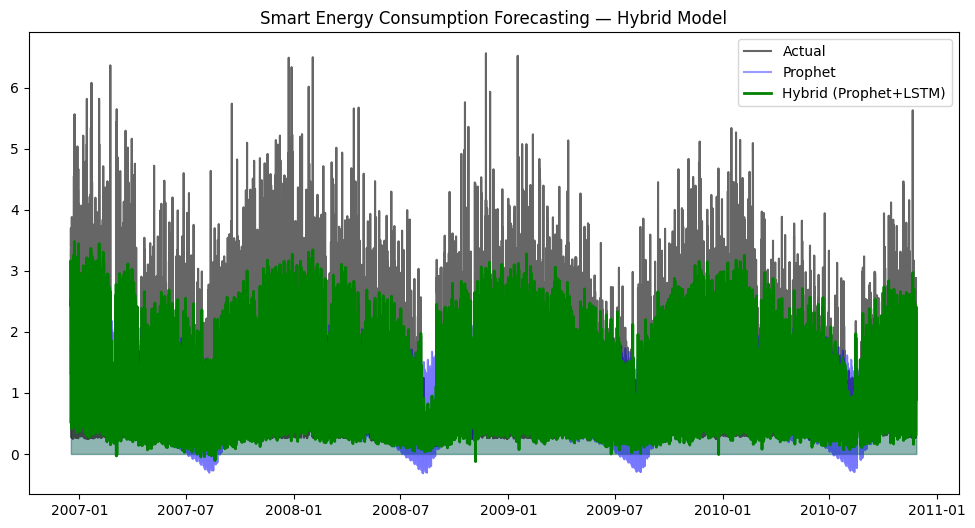

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

mae_prophet = mean_absolute_error(hourly['Global_active_power'], hourly['prophet_pred'])
mae_hybrid  = mean_absolute_error(hourly['Global_active_power'], hourly['hybrid_pred'])

print(f"Prophet MAE: {mae_prophet:.3f}")
print(f"Hybrid MAE:  {mae_hybrid:.3f}")

plt.figure(figsize=(12,6))
plt.plot(hourly['DateTime'], hourly['Global_active_power'], label='Actual', color='black', alpha=0.6)
plt.plot(hourly['DateTime'], hourly['prophet_pred'], label='Prophet', color='blue', alpha=0.4)
plt.plot(hourly['DateTime'], hourly['hybrid_pred'], label='Hybrid (Prophet+LSTM)', color='green', linewidth=2)
plt.legend()
plt.title("Smart Energy Consumption Forecasting — Hybrid Model")
plt.fill_between(hourly['DateTime'], hourly['prophet_pred'], color='blue', alpha=0.2, label='Prophet')
plt.fill_between(hourly['DateTime'], hourly['hybrid_pred'], color='green', alpha=0.3, label='Hybrid (Prophet+LSTM)')

plt.show()


In [27]:
print(hourly)

                 DateTime  Global_active_power  hour  day  month  dayofweek  \
0     2006-12-17 17:00:00             3.406767    17   17     12          6   
1     2006-12-17 18:00:00             3.697100    18   17     12          6   
2     2006-12-17 19:00:00             2.908400    19   17     12          6   
3     2006-12-17 20:00:00             3.361500    20   17     12          6   
4     2006-12-17 21:00:00             3.040767    21   17     12          6   
...                   ...                  ...   ...  ...    ...        ...   
34139 2010-11-26 17:00:00             1.725900    17   26     11          4   
34140 2010-11-26 18:00:00             1.573467    18   26     11          4   
34141 2010-11-26 19:00:00             1.659333    19   26     11          4   
34142 2010-11-26 20:00:00             1.163700    20   26     11          4   
34143 2010-11-26 21:00:00             0.934667    21   26     11          4   

       is_weekend  prophet_pred  residual  lstm_res

d:\Energy Consumption\Backend\energy_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\Energy Consumption\Backend\energy_venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(720,)
(720, 22)


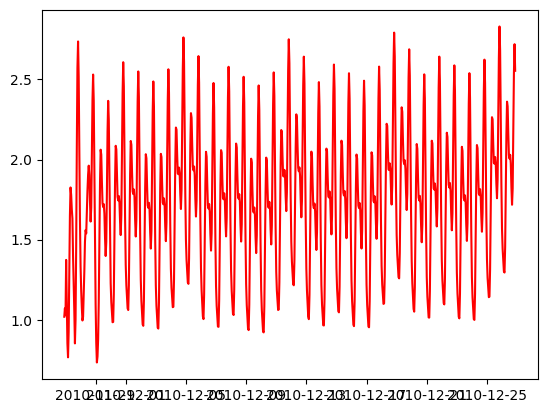

In [86]:
import matplotlib.pyplot as plt

import numpy as np

# --- 1️⃣ Last 24 residuals from history (scaled!) ---
last_residuals = scaler.transform(hourly['residual'].values[-24*30:].reshape(-1,1)).flatten()

future_residual_preds = []

# --- 2️⃣ Recursive prediction for next 8760 hours ---
steps = 24*30
window = 18

X_seq = scaler.transform(hourly['residual'].values[-window:].reshape(-1,1)).flatten()
future_residual_preds = []

for _ in range(steps):
    X_input = X_seq[-window:].reshape(1, window, 1).astype(np.float32)
    next_residual = model.predict(X_input, verbose=0)
    next_residual = float(next_residual[0][0])
    future_residual_preds.append(next_residual)
    X_seq = np.append(X_seq, next_residual)


# --- 3️⃣ Inverse scale residual predictions ---
future_residual_preds = scaler.inverse_transform(
    np.array(future_residual_preds).reshape(-1,1)
).flatten()

print(future_residual_preds.shape)

# Extract future part from Prophet forecast
future_df = forecast[forecast['ds'] > hourly['DateTime'].max()].copy()
future_df.rename(columns={'ds': 'DateTime', 'yhat': 'prophet_pred'}, inplace=True)
print(future_df.shape)
# ✅ LSTM must predict future residuals here
# Example placeholder (replace with real lstm output)
future_df['lstm_residual_pred'] = future_residual_preds   # <-- must be array length 8760

# Hybrid = Prophet + LSTM correction
future_df['hybrid_pred'] = future_df['prophet_pred'] + future_df['lstm_residual_pred']

plt.plot(future_df['DateTime'], future_df['hybrid_pred'], color='red')


In [87]:
diff = (future_df['hybrid_pred'] - future_df['prophet_pred']).abs().sum()
print("total absolute hybrid-prophet difference:", diff)


total absolute hybrid-prophet difference: 247.90046374694822


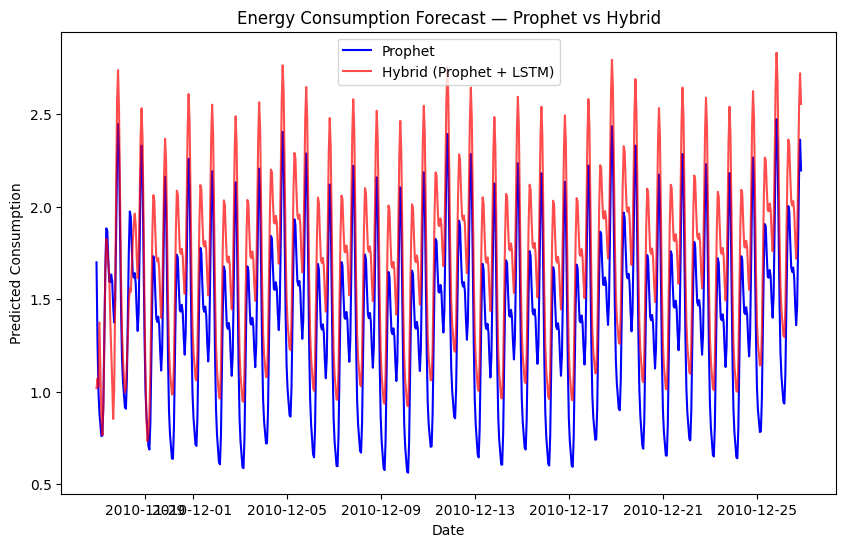

In [88]:
plt.figure(figsize=(10,6))
plt.plot(future_df['DateTime'], future_df['prophet_pred'], color='blue', label='Prophet')
plt.plot(future_df['DateTime'], future_df['hybrid_pred'], color='red', label='Hybrid (Prophet + LSTM)',alpha=0.7)
plt.legend()
plt.title("Energy Consumption Forecast — Prophet vs Hybrid")
plt.xlabel("Date")
plt.ylabel("Predicted Consumption")
plt.show()


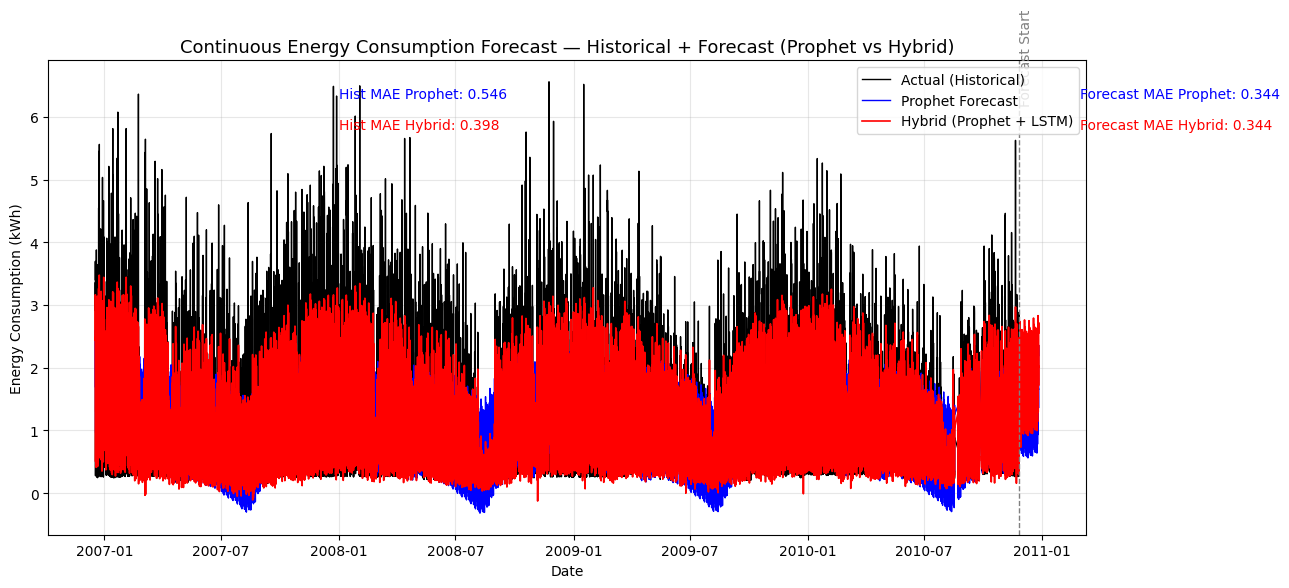

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Ensure datetime consistency
hourly['DateTime'] = pd.to_datetime(hourly['DateTime'])
future_df['DateTime'] = pd.to_datetime(future_df['DateTime'])

# ✅ Combine historical + forecast hybrid data
combined_hybrid = pd.concat([
    hourly[['DateTime', 'hybrid_pred']],
    future_df[['DateTime', 'hybrid_pred']]
], ignore_index=True)

# Combine Prophet predictions too (for continuous Prophet line)
combined_prophet = pd.concat([
    hourly[['DateTime', 'prophet_pred']],
    future_df[['DateTime', 'prophet_pred']]
], ignore_index=True)

# Identify where forecast begins
forecast_start = hourly['DateTime'].max()

# --- Plot ---
plt.figure(figsize=(13,6))

# Historical actuals
plt.plot(hourly['DateTime'], hourly['Global_active_power'], color='black', linewidth=1, label='Actual (Historical)')

# Prophet (continuous)
plt.plot(combined_prophet['DateTime'], combined_prophet['prophet_pred'], color='blue', linewidth=1, label='Prophet Forecast')

# Hybrid (continuous — both historical + future)
plt.plot(combined_hybrid['DateTime'], combined_hybrid['hybrid_pred'], color='red', linewidth=1.2, label='Hybrid (Prophet + LSTM)')

# Forecast start line
plt.axvline(x=forecast_start, color='gray', linestyle='--', linewidth=1)
plt.text(forecast_start, plt.ylim()[1]*0.9, 'Forecast Start', rotation=90, color='gray')

# Historical section
mask_hist = combined_hybrid['DateTime'] <= forecast_start
mae_prophet_hist = mean_absolute_error(hourly['Global_active_power'], hourly['prophet_pred'])
mae_hybrid_hist = mean_absolute_error(hourly['Global_active_power'], hourly['hybrid_pred'])

# Forecast section
mae_prophet_fore = mean_absolute_error(future_df['prophet_pred'], future_df['hybrid_pred'])  # or vs actual if you have true future
mae_hybrid_fore = mean_absolute_error(future_df['hybrid_pred'], future_df['prophet_pred'])

plt.text(pd.Timestamp("2008-01-01"), 6.3, f"Hist MAE Prophet: {mae_prophet_hist:.3f}", color='blue')
plt.text(pd.Timestamp("2008-01-01"), 5.8, f"Hist MAE Hybrid: {mae_hybrid_hist:.3f}", color='red')
plt.text(pd.Timestamp("2011-03-01"), 6.3, f"Forecast MAE Prophet: {mae_prophet_fore:.3f}", color='blue')
plt.text(pd.Timestamp("2011-03-01"), 5.8, f"Forecast MAE Hybrid: {mae_hybrid_fore:.3f}", color='red')
# Style
plt.title("Continuous Energy Consumption Forecast — Historical + Forecast (Prophet vs Hybrid)", fontsize=13)
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()







In [31]:
# Last WINDOW residuals from history
WINDOW=24
last_residuals = hourly['residual'].values[-WINDOW:].reshape(1, WINDOW, 1)

future_residual_preds = []

for i in range(365*24):  # 1 year hourly
    next_residual = model.predict(last_residuals, verbose=0)[0][0]
    future_residual_preds.append(next_residual)

    # Slide window and append next residual
    last_residuals = np.append(last_residuals[:,1:,:], [[[next_residual]]], axis=1)



In [29]:
last_actual_time = hourly['DateTime'].max()
future_df = forecast[forecast['ds'] > last_actual_time].reset_index(drop=True)
history_df = forecast[forecast['ds'] <= last_actual_time].reset_index(drop=True)



In [30]:
future_df['lstm_residual'] = future_residual_preds
future_df['hybrid_pred'] = future_df['yhat'] + future_df['lstm_residual']
history_df['lstm_residual'] = 0
history_df['hybrid_pred'] = history_df['yhat']
full_hybrid = pd.concat([history_df, future_df], ignore_index=True)

ValueError: Length of values (168) does not match length of index (8760)

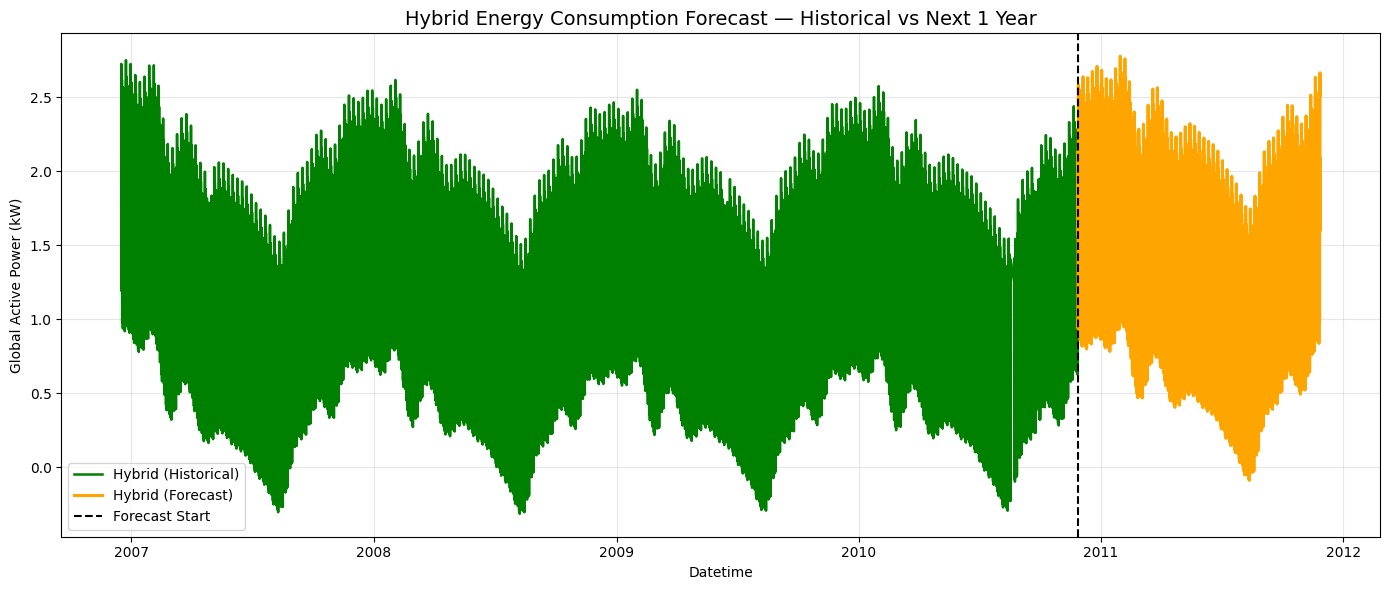

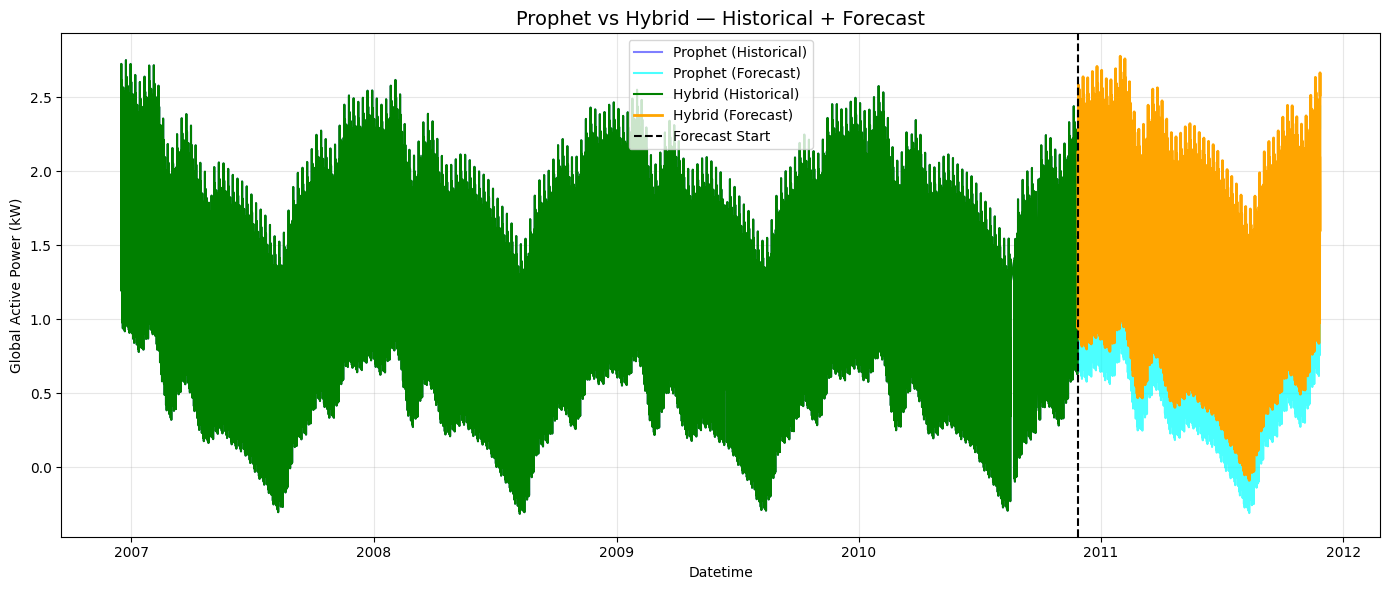

In [75]:
plt.figure(figsize=(14,6))

# 1️⃣ Plot historical hybrid
plt.plot(
    history_df['ds'], 
    history_df['hybrid_pred'], 
    label='Hybrid (Historical)', 
    color='green', 
    linewidth=1.8
)

# 2️⃣ Plot future_df hybrid
plt.plot(
    future_df['ds'], 
    future_df['hybrid_pred'], 
    label='Hybrid (Forecast)', 
    color='orange', 
    linewidth=2.2
)

# 3️⃣ Add separation line
plt.axvline(
    x=history_df['ds'].iloc[-1], 
    color='black', 
    linestyle='--', 
    linewidth=1.5, 
    label='Forecast Start'
)

plt.title("Hybrid Energy Consumption Forecast — Historical vs Next 1 Year", fontsize=14)
plt.xlabel("Datetime")
plt.ylabel("Global Active Power (kW)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))

plt.plot(history_df['ds'], history_df['yhat'], label='Prophet (Historical)', color='blue', alpha=0.5)
plt.plot(future_df['ds'], future_df['yhat'], label='Prophet (Forecast)', color='cyan', alpha=0.7)

plt.plot(history_df['ds'], history_df['hybrid_pred'], label='Hybrid (Historical)', color='green')
plt.plot(future_df['ds'], future_df['hybrid_pred'], label='Hybrid (Forecast)', color='orange', linewidth=2)

plt.axvline(x=history_df['ds'].iloc[-1], color='black', linestyle='--', linewidth=1.5, label='Forecast Start')

plt.title("Prophet vs Hybrid — Historical + Forecast", fontsize=14)
plt.xlabel("Datetime")
plt.ylabel("Global Active Power (kW)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



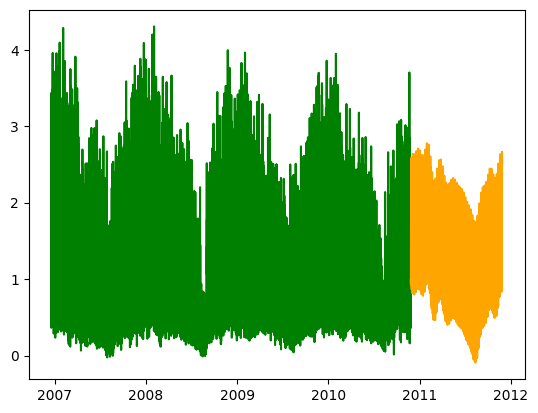

In [78]:
plt.plot(hourly['DateTime'], hourly['hybrid_pred'], color='green', label='Hybrid (Historical)')
plt.plot(future_df['ds'], future_df['hybrid_pred'], color='orange', label='Hybrid (Forecast)')


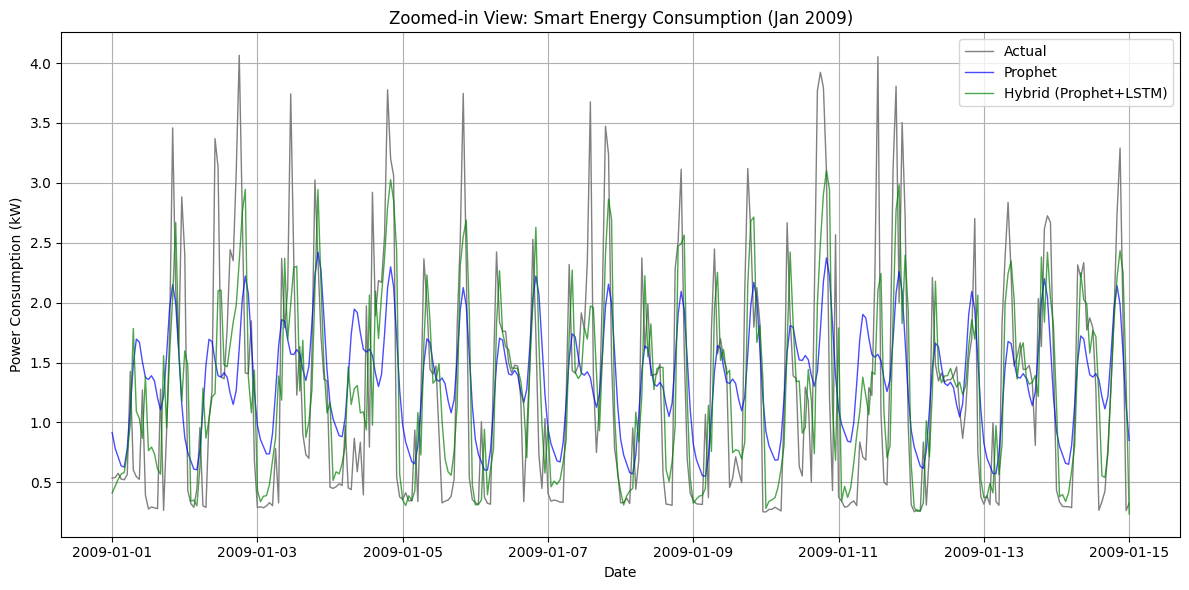

In [35]:
import matplotlib.pyplot as plt

# Example: zoom into January 2009
start_date = "2009-01-01"
end_date   = "2009-01-15"

# Filter data
zoom_df = hourly[(hourly['DateTime'] >= start_date) & (hourly['DateTime'] <= end_date)]

# Plot zoomed window
plt.figure(figsize=(12,6))
plt.plot(zoom_df['DateTime'], zoom_df['Global_active_power'], color='gray', label='Actual', linewidth=1)
plt.plot(zoom_df['DateTime'], zoom_df['prophet_pred'], color='blue', alpha=0.7, label='Prophet', linewidth=1)
plt.plot(zoom_df['DateTime'], zoom_df['hybrid_pred'], color='green', alpha=0.7, label='Hybrid (Prophet+LSTM)', linewidth=1)

plt.title("Zoomed-in View: Smart Energy Consumption (Jan 2009)")
plt.xlabel("Date")
plt.ylabel("Power Consumption (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
train = hourly[hourly['DateTime'] < '2009-01-01']
test  = hourly[hourly['DateTime'] >= '2009-01-01']

y_train, y_test = train['Global_active_power'], test['Global_active_power']
y_pred_train = train['hybrid_pred']
y_pred_test  = test['hybrid_pred']

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test  = mean_absolute_error(y_test, y_pred_test)
print(mae_train, mae_test)


0.4303409377240604 0.37959974602939883


In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Actual vs predicted
y_true = hourly['Global_active_power']
y_pred_prophet = hourly['prophet_pred']
y_pred_hybrid  = hourly['hybrid_pred']

# MAE
mae_prophet = mean_absolute_error(y_true, y_pred_prophet)
mae_hybrid  = mean_absolute_error(y_true, y_pred_hybrid)

# RMSE
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred_prophet))
rmse_hybrid  = np.sqrt(mean_squared_error(y_true, y_pred_hybrid))

# MAPE (Mean Absolute Percentage Error)
# Add small epsilon to avoid division by zero
epsilon = 1e-10
mape_prophet = np.mean(np.abs((y_true - y_pred_prophet) / (y_true + epsilon))) * 100
mape_hybrid  = np.mean(np.abs((y_true - y_pred_hybrid)  / (y_true + epsilon))) * 100

# Print neatly
print(f"📊 Prophet  → MAE: {mae_prophet:.3f}, RMSE: {rmse_prophet:.3f}, MAPE: {mape_prophet:.2f}%")
print(f"⚡ Hybrid   → MAE: {mae_hybrid:.3f}, RMSE: {rmse_hybrid:.3f}, MAPE: {mape_hybrid:.2f}%")


📊 Prophet  → MAE: 0.546, RMSE: 0.728, MAPE: 87.77%
⚡ Hybrid   → MAE: 0.398, RMSE: 0.571, MAPE: 53.88%


In [59]:
import os, joblib

os.makedirs("model", exist_ok=True)

# Save Prophet (using joblib)
joblib.dump(model_prophet, "Backend/model/prophet_model.pkl")

# Save LSTM
model.save("Backend/model/lstm_model.keras")

# Save Scaler
joblib.dump(scaler, "Backend/model/scaler.pkl")

print("✅ Prophet, LSTM, and Scaler saved successfully!")

✅ Prophet, LSTM, and Scaler saved successfully!
